In [28]:
# =============================
# 1️⃣ Import thư viện
# =============================
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import umap

In [29]:

# =============================
# 2️⃣ Tải dữ liệu Student Performance
# =============================
student_performance = fetch_ucirepo(id=320)

# Dữ liệu đặc trưng và nhãn
X = student_performance.data.features
y = student_performance.data.targets
y = y["G3"]
print("Kích thước dữ liệu ban đầu:", X.shape)


Kích thước dữ liệu ban đầu: (649, 30)


In [30]:
X["school"].value_counts()

school
GP    423
MS    226
Name: count, dtype: int64

In [31]:

# =============================
# 3️⃣ Mã hóa biến phân loại (One-Hot Encoding)
# =============================
X_encoded = pd.get_dummies(X, drop_first=True)

print("Kích thước sau mã hóa:", X_encoded.shape)



Kích thước sau mã hóa: (649, 39)


In [32]:
# =============================
# 🧩 3.1️⃣ Tách dữ liệu theo 'school' (GP và MS)
# =============================
# Xác định các dòng thuộc mỗi trường
mask_gp = X["school"] == "GP"
mask_ms = X["school"] == "MS"


In [33]:

# Tách dữ liệu và nhãn
X_source = X_encoded[mask_gp].copy()
y_source = y[mask_gp].copy()

X_target = X_encoded[mask_ms].copy()
y_target = y[mask_ms].copy()

print(f"\nSố lượng mẫu GP (source): {len(X_source)}")
print(f"Số lượng mẫu MS (target): {len(X_target)}")



Số lượng mẫu GP (source): 423
Số lượng mẫu MS (target): 226


In [34]:

# =============================
# 🧮 3.2️⃣ Chuẩn hóa từng domain riêng biệt (StandardScaler)
# =============================
scaler_source = StandardScaler()
X_source_scaled = scaler_source.fit_transform(X_source)
# X_source_scaled = pd.DataFrame(X_source_scaled, columns=X_source.columns)

scaler_target = StandardScaler()
X_target_scaled = scaler_target.fit_transform(X_target)
# X_target_scaled = pd.DataFrame(X_target_scaled, columns=X_target.columns)


In [35]:
# =============================
# 6️⃣ Giảm chiều bằng UMAP (2D)
# =============================
umap_model = umap.UMAP(random_state=42)
X_source_umap = umap_model.fit_transform(X_source_scaled)
X_target_umap = umap_model.fit_transform(X_target_scaled)

c:\Users\Asus\anaconda3\envs\dann\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [36]:
y_source

0      11
1      11
2      12
3      14
4      13
       ..
418    14
419    11
420    17
421    10
422    13
Name: G3, Length: 423, dtype: int64

C:\Users\Asus\AppData\Local\Temp\ipykernel_28692\3420460746.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


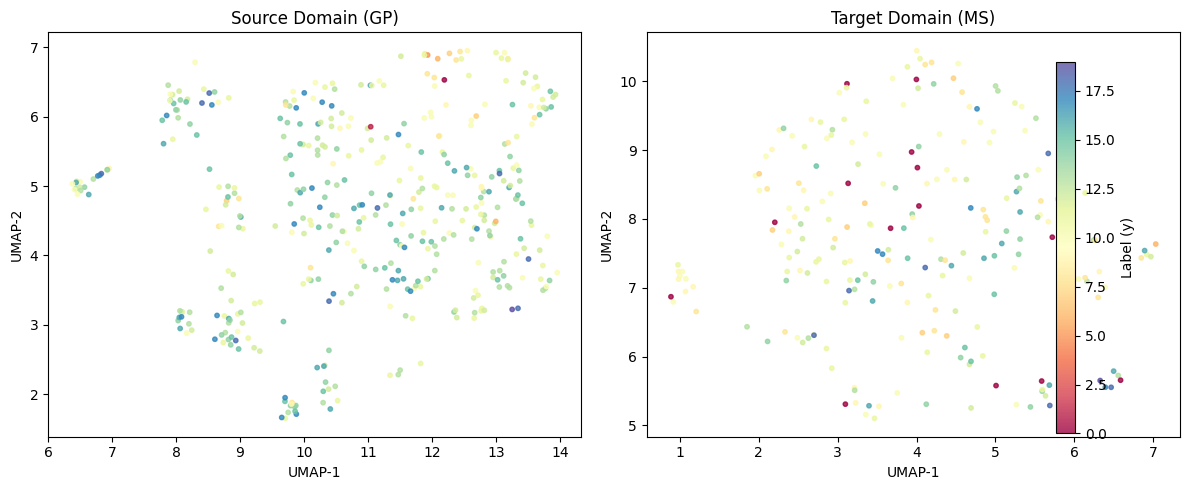

In [37]:
# =============================
# 7️⃣ Plot song song (source - target)
# =============================
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Source (GP) ---
scatter1 = axes[0].scatter(
    X_source_umap[:, 0], X_source_umap[:, 1],
    c=y_source.values.ravel(), cmap='Spectral', s=10, alpha=0.8
)
axes[0].set_title("Source Domain (GP)")
axes[0].set_xlabel("UMAP-1")
axes[0].set_ylabel("UMAP-2")

# --- Target (MS) ---
scatter2 = axes[1].scatter(
    X_target_umap[:, 0], X_target_umap[:, 1],
    c=y_target.values.ravel(), cmap='Spectral', s=10, alpha=0.8
)
axes[1].set_title("Target Domain (MS)")
axes[1].set_xlabel("UMAP-1")
axes[1].set_ylabel("UMAP-2")

# --- Chung ---
fig.colorbar(scatter1, ax=axes, orientation='vertical', fraction=0.02, pad=0.02, label="Label (y)")
plt.tight_layout()
plt.show()

c:\Users\Asus\anaconda3\envs\dann\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


🔝 Top 15 feature có ảnh hưởng mạnh nhất đến cấu trúc UMAP:
         Feature  MI_UMAP1  MI_UMAP2  MI_Total
50     higher_no  0.079088  0.267970  0.347059
51    higher_yes  0.079088  0.267970  0.347059
1           Medu  0.196727  0.108530  0.305258
27  Mjob_teacher  0.133364  0.160854  0.294219
45      paid_yes  0.190248  0.072801  0.263049
44       paid_no  0.190248  0.072801  0.263049
24   Mjob_health  0.152900  0.069605  0.222505
2           Fedu  0.100836  0.117595  0.218431
13     school_GP  0.143533  0.068179  0.211712
14     school_MS  0.143533  0.068179  0.211712
17     address_R  0.202124  0.002594  0.204718
18     address_U  0.202124  0.002594  0.204718
29   Fjob_health  0.110067  0.090051  0.200118
32  Fjob_teacher  0.030093  0.156004  0.186097
40  schoolsup_no  0.052159  0.133642  0.185801


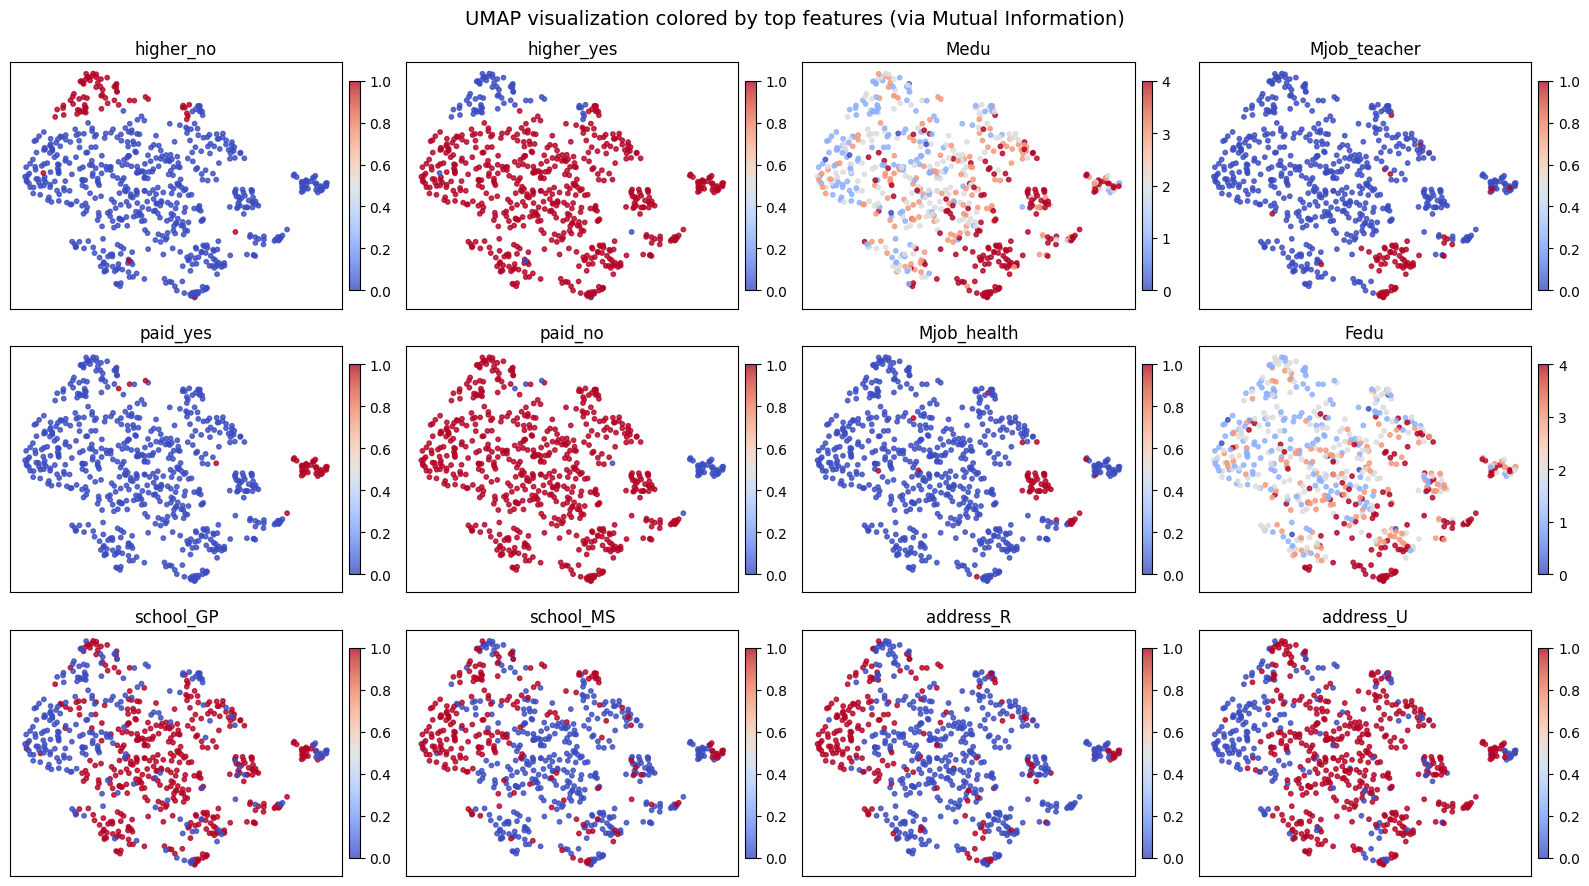

In [39]:
# =============================
# 1️⃣ Import thư viện
# =============================
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression
import umap.umap_ as umap
import matplotlib.pyplot as plt

# =============================
# 2️⃣ Tải và chuẩn hóa dữ liệu
# =============================
student_performance = fetch_ucirepo(id=320)
X = student_performance.data.features
y = student_performance.data.targets

# One-hot encode tất cả biến phân loại
X_encoded = pd.get_dummies(X, drop_first=False)

# Chuẩn hóa
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# =============================
# 3️⃣ Giảm chiều bằng UMAP (2D)
# =============================
umap_model = umap.UMAP(random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

# =============================
# 4️⃣ Tính mức ảnh hưởng của từng feature
# =============================
# Mutual Information giữa từng feature và UMAP component 1
mi1 = mutual_info_regression(X_scaled, X_umap[:, 0])
# Mutual Information giữa feature và UMAP component 2
mi2 = mutual_info_regression(X_scaled, X_umap[:, 1])

# Tổng MI để đánh giá mức ảnh hưởng tổng quát
mi_total = mi1 + mi2
mi_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'MI_UMAP1': mi1,
    'MI_UMAP2': mi2,
    'MI_Total': mi_total
}).sort_values('MI_Total', ascending=False)

print("🔝 Top 15 feature có ảnh hưởng mạnh nhất đến cấu trúc UMAP:")
print(mi_df.head(15))

# =============================
# 5️⃣ Vẽ trực quan Top-N feature ảnh hưởng mạnh nhất
# =============================
top_n = 12  # thử nhiều feature
top_features = mi_df.head(top_n)['Feature'].values

n_cols = 4
n_rows = int(np.ceil(top_n / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 3))
axes = axes.flatten()

for i, feat in enumerate(top_features):
    sc = axes[i].scatter(X_umap[:, 0], X_umap[:, 1],
                         c=X_encoded[feat].values, cmap='coolwarm', s=10, alpha=0.8)
    axes[i].set_title(feat)
    axes[i].set_xticks([]); axes[i].set_yticks([])
    fig.colorbar(sc, ax=axes[i], fraction=0.03, pad=0.02)

# Ẩn subplot thừa
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.suptitle("UMAP visualization colored by top features (via Mutual Information)", fontsize=14)
plt.tight_layout()
plt.show()
